In [ ]:
# text recognition in images

# https://pypi.org/project/pytesseract/

# sudo apt install tesseract-ocr    # ubuntu
# sudo apt install tesseract-ocr-kor

# https://github.com/UB-Mannheim/tesseract/releases    # windows + PATH

# pip install pytesseract

In [ ]:
# 언어 추가 설치

# !apt-get install tesseract-ocr-kor
# !apt-get install tesseract-ocr-eng
# !apt-get install tesseract-ocr-por

# Tesseract OCR에서 한국어(kor) 인식 기능을 사용하려면, 이 언어 데이터 파일(kor.traineddata)이 반드시 필요합니다.
# https://github.com/tesseract-ocr/tessdata/tree/main

# 리눅스에서 파일을 인터넷에서 다운로드할 때 사용하는 명령어 wget 
# !wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true
# !wget -O ./tessdata/kor.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/kor.traineddata?raw=true
# !wget -O ./tessdata/kor_vert.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/kor_vert.traineddata?raw=true
# !wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

In [8]:
# import libraries

import os
import pytesseract      # pip install pytesseract
import numpy as np
import cv2          # pip install opencv-python
from matplotlib import pyplot as plt
# from google.colab.patches import cv2_imshow

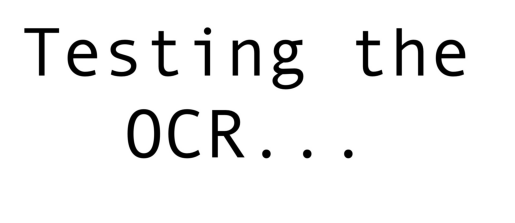

In [ ]:
import cv2
from matplotlib import pyplot as plt

# read image
# print(cv2.__version__)

img = cv2.imread('./content/test01.jpg')
# cv2.imshow(img)    # .py
# cv2_imshow(img)    # colab
plt.imshow(img)
plt.axis('off')
plt.show()


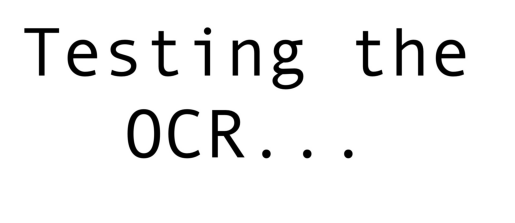

In [ ]:
# OpenCV는 BGR로 되어있으니 반드시 RGB로 교체하고 사용해야한다
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)              # BGR -> RGB
# cv2.imshow(rgb)
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [ ]:
# pytesseract로 RGB 이미지에서 텍스트 추출
text = pytesseract.image_to_string(rgb, lang='eng+kor')  # lang='eng' or 'kor' or 'eng+kor'

In [ ]:
print(text)

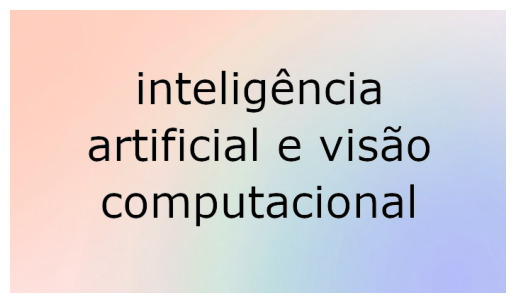

In [ ]:


img = cv2.imread('./content/test02-02.jpg')
# cv2.imshow(img)
plt.imshow(img)
plt.axis('off')
plt.show()


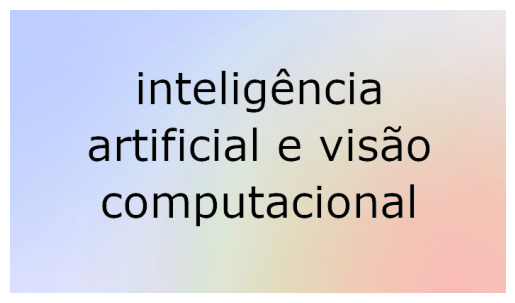

In [ ]:
# OpenCV는 BGR로 되어있으니 반드시 RGB로 교체하고 사용해야한다
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow(rgb)
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [ ]:
text = pytesseract.image_to_string(rgb)
print(text)

In [ ]:
# able languages
!tesseract --list-langs

'tesseract'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

In [ ]:
# PSM : Page segmentation modes (PSM 모드에 대한 설명)
!tesseract --help-psm

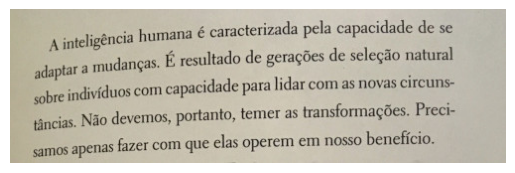

In [20]:
img = cv2.imread('./content/page-book.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow(rgb)
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [ ]:
# config_tesseract = '--tessdata-dir ./tessdata --oem 3 --psm 6'  # psm: page segmentation mode
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 7'            # Threat All Single Line
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

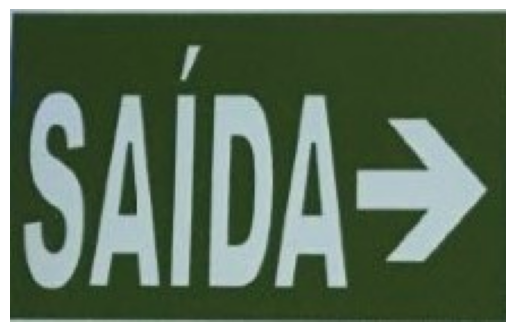

In [21]:
# exit.jpg
img = cv2.imread('./content/exit.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow(rgb)
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 7'            # Threat All Single Line
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

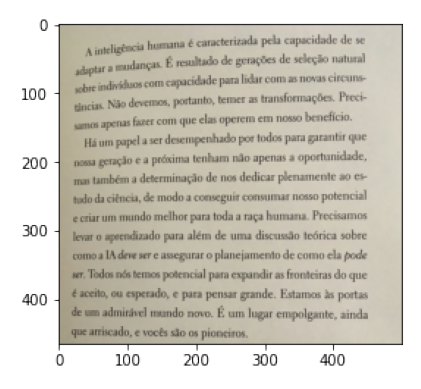

In [24]:
# Page Orientation
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('./content/book01.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# OSD는 Orientation and Script Detection의 약자입니다
# 이미지를 분석해서 텍스트가 어느 방향(회전각)으로 놓여 있는지 (0도, 90도, 180도, 270도), 세로쓰기/가로쓰기 여부, 어떤 문자 스크립트(라틴, 한글, 한자 등)로 쓰여 있는지
print(pytesseract.image_to_osd(img))

In [ ]:
# Selection of Texts
from pytesseract import Output

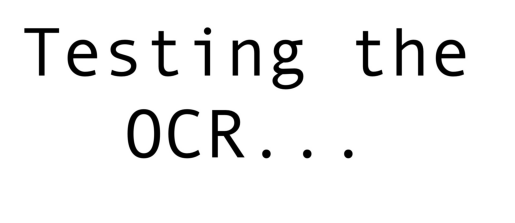

In [25]:
img = cv2.imread('./content/test01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow(rgb)
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='eng+kor', output_type=Output.DICT)
result

In [ ]:
# extracted texts
result['text']

In [ ]:
def bounding_box(result, img, i, color=(255,100,0)):
    x = result['left'][i]
    y = result['top'][i]
    w = result['width'][i]
    h = result['height'][i]

    cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)
    return x, y, img

In [ ]:
# 40% 이상 감지된 부분에 박스 표시해보기

min_confidence = 40             # minimum confidence level to consider a text valid (40% 이상 정확도만 해당하게)
img_copy = rgb.copy()
for idx in range(0, len(result['text'])):
    confidence = int(result['conf'][idx])
    if confidence > min_confidence:
        print(confidence)
        x, y, img = bounding_box(result, img_copy, idx)
        text = result['text'][idx]
        cv2.putText(img_copy, text, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255))       # 글자 표시 (영어만 가능해서 밑에 폰트 추가버전 사용 권장...)
cv2.imshow(img_copy)

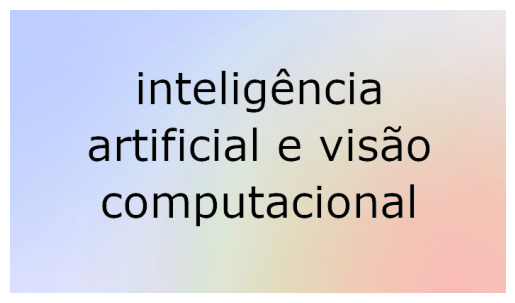

In [26]:
img = cv2.imread('./content/test02-02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow(rgb)
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [ ]:
# 추출 정보 확인
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
result

In [ ]:
# 전용 폰트 적용
from PIL import ImageFont, ImageDraw, Image
import numpy as np
# font = './fonts/calibri.ttf'
font = './fonts/NotoSansKR-Regular.ttf'

In [ ]:
# 원하는 폰트로 텍스트 기록 (한글, 특수문자 가능)
def write_text(text, x, y, img, font, font_size=32):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - font_size), text, font=font)
    img = np.array(img_pil)
    return img

In [ ]:
# 특수문자는 cv2 폰트에서 깨짐 (FONT_HERSHEY_SIMPLEX)

min_confidence = 40
img_copy = rgb.copy()
for idx in range(0, len(result['text'])):
    confidence = int(result['conf'][idx])
    if confidence > min_confidence:
        x, y, img = bounding_box(result, img_copy, idx)
        text = result['text'][idx]
        # cv2.putText(img_copy, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255))
        img_copy = write_text(text, x, y, img_copy, font)           # 원하는 폰트로 텍스트 기록
# cv2.imshow(img_copy)
plt.imshow(img_copy)
plt.axis('off')
plt.show()
